# Problem

For every employer, they want to ensure that they retain their employees for various reasons. Replacing a current employee would not only take time and resources, but the employer loses the institutional knowledge that has been placed in their employee for however long he/she worked for them. According to the Bureau of Labor Statistics, 5.2 million people separate from their jobs every month. Using different machine learning methods, I will try to answer the question: Why do employees leave?

Reference: https://www.bls.gov/news.release/jolts.t09.htm

Data Set: https://www.kaggle.com/ludobenistant/hr-analytics

# Hypothesis

There are a few features that will directly correlate to why an employee quits his/her job. I believe it will predominantly be based on their satisfaction level, hours worked, and time spent at the company.

# Datasets 

Features include:

1) Satisfaction Level: Level of happiness at work. (1 = highest, 0 = lowest)

2) Last Evaluation: Time that has past since the employee's last evaluation.

3) Number of Projects: The number of projects an employee worked in during their tenure.

4) Average Monthly Hours: On average, the number of hours an employee works a month.

5) Time Spend with the Company: The number of years the employee was with their employer.

6) Work Accident: Shows if the employee had a work related accident. (1 = yes, 0 = no)

7) Left: Whether the employee left the company. (1 = yes, 0 = no)

8) Promotion within the last 5 years: Whether or not an employee was promoted within the past five years.

9) Department: The division the employee works in.

10) Salary: Categorical level of how much an employee is paid. (low, medium, high)

# Assumptions

The data from my sample are representative of all workers and companies.

The data corresponds across various factors. Example is that salary levels at companies vary depending on the industry and role. However, I am making the assumption that the level that was chosen for this data set works across all companies.

# Concerns

Unsure about how this will be compared with new data.

In [2]:
import os

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from IPython.display import Image

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import itertools

import math
from sklearn import preprocessing, neighbors, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;
from sklearn import feature_selection, linear_model
from sklearn.cross_validation import train_test_split

/Users/raymonddelacruz/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/raymonddelacruz/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


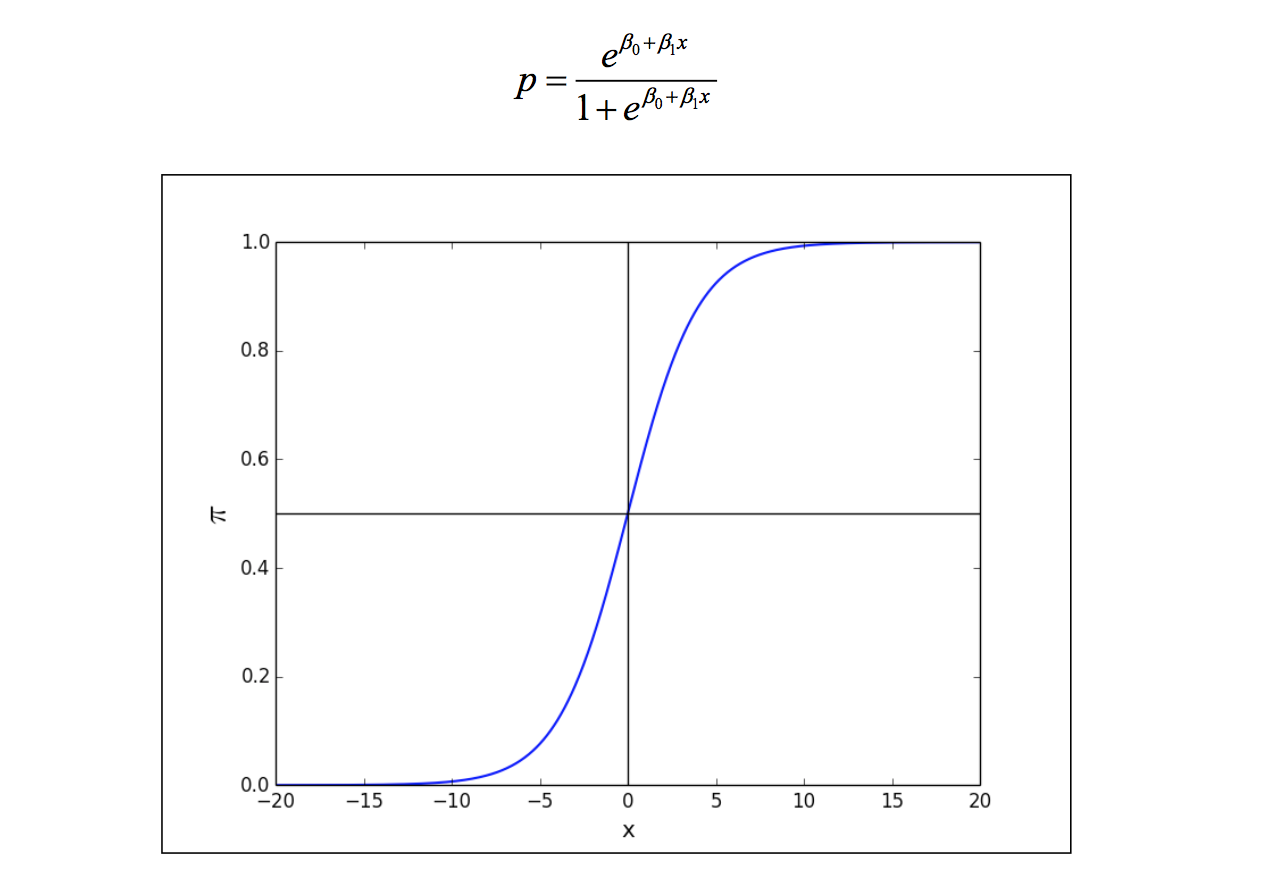

In [3]:
Image("logit_model.png")
#Source: Sinan Ozdemir

In [4]:
df = pd.read_csv('HR_Data.csv')

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
#Understand the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
columns_X = ['satisfaction_level', 'number_project', 'average_montly_hours']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [8]:
X

array([[ 0.31868132,  0.        ,  0.28504673],
       [ 0.78021978,  0.6       ,  0.77570093],
       [ 0.02197802,  1.        ,  0.82242991],
       ..., 
       [ 0.30769231,  0.        ,  0.21962617],
       [ 0.02197802,  0.8       ,  0.85981308],
       [ 0.30769231,  0.        ,  0.28971963]])

In [9]:
type(X)

numpy.ndarray

In [10]:
X.shape

(14999, 3)

In [11]:
c = df.left

In [12]:
c

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [13]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1).\
    fit(X, c) 

In [14]:
model.score(X, c)

0.98553236882458828

# Train/Test/Split

In [15]:
train_df = df.sample(frac = .5, random_state = 0).sort_index()

In [16]:
train_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
5,0.41,0.50,2,153,3,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low
12,0.84,0.92,4,234,5,0,1,0,sales,low
14,0.36,0.56,2,137,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14987,0.90,0.70,5,206,4,0,1,0,technical,low
14988,0.46,0.55,2,145,3,0,1,0,technical,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low


In [17]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


NameError: name 'y' is not defined

In [164]:
# KNN accuracy on original data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.931733333333


In [167]:
#Cross Validation
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

0.94119768588122432

In [169]:
#Next Steps
1) Make Salary into 3 different numbers
2) Add more features
3) Matric of False Positive, Positive Positive, etc


SyntaxError: invalid syntax (<ipython-input-169-965a702e92f3>, line 2)

In [ ]:
#Decision Tree + Genie Index and Logistic Regression

In [93]:
#Make the data into a column form
columns= df.columns.tolist()
columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [94]:
corr = df.corr()

corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


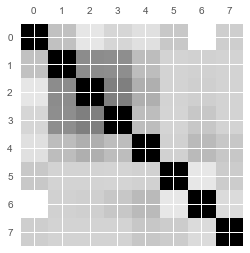

In [95]:
plt.matshow(corr)

In [96]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [97]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [98]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


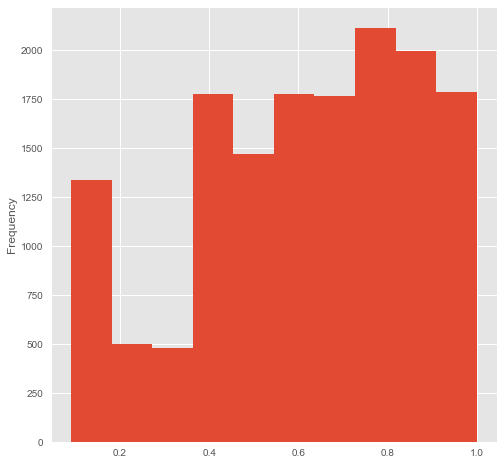

In [99]:
df.satisfaction_level.plot(kind = 'hist', figsize = (8, 8))

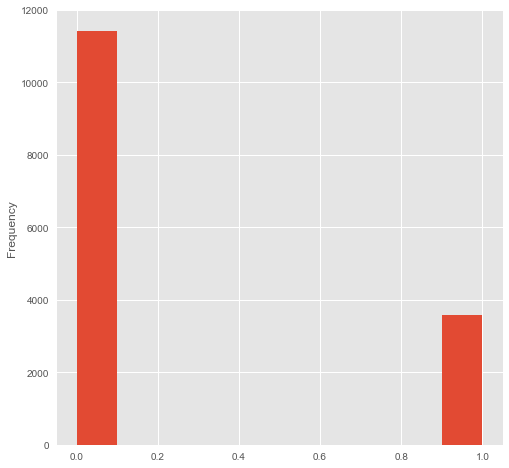

In [100]:
df.left.plot(kind = 'hist', figsize = (8, 8))

In [101]:
df.left.describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

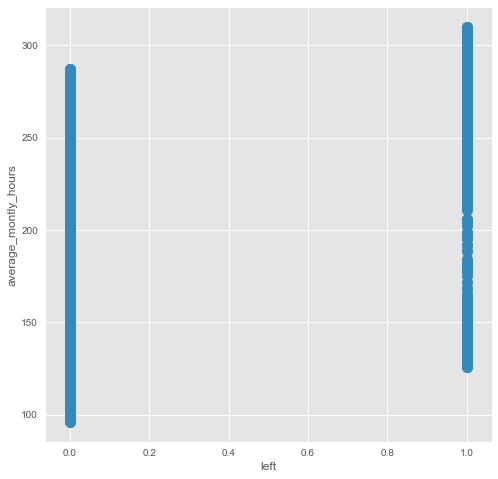

In [102]:
df.plot(kind = 'scatter', x = 'left', y = 'average_montly_hours', s = 100, figsize = (8, 8))

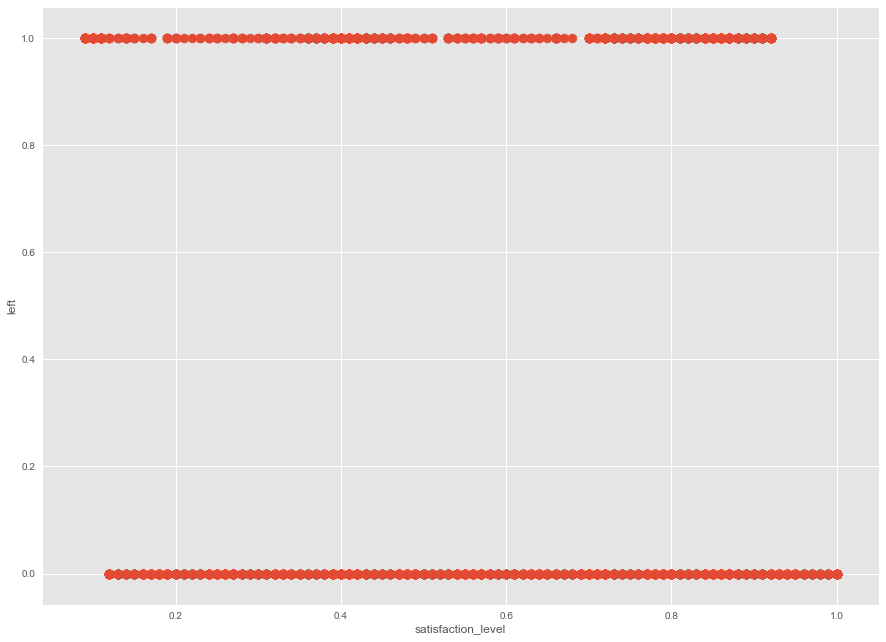

In [131]:
plt.figure(figsize=(15,11))
plt.scatter(df['satisfaction_level'], df['left'], s=80)
plt.xlabel('satisfaction_level')
plt.ylabel("left");

In [104]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [136]:
#Null Accuracy
3571.0 / 11428

0.31247812390619534

In [105]:
X = df[["average_montly_hours"]]
y = df.left

linreg = LinearRegression()

linreg.fit(X, y)

pred = linreg.predict(X);

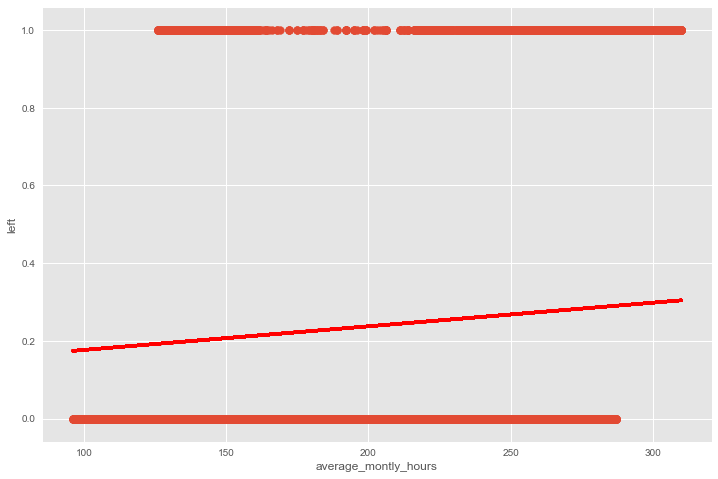

In [106]:
plt.figure(figsize=(12,8))
plt.xlabel("average_montly_hours")
plt.ylabel("left")
plt.scatter(X,y, s=60)
plt.plot(X, pred, c="r", linewidth=3);

In [107]:
logr = LogisticRegression()
logr.fit(X,y);

In [108]:
score = logr.score(X,y)
print "The accuracy score is {:.2f} percent".format(score*100)

The accuracy score is 76.19 percent


In [109]:
logr.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
pred_labels = logr.predict(X)

In [111]:
logr.predict_proba(X)


array([[ 0.78794346,  0.21205654],
       [ 0.72516587,  0.27483413],
       [ 0.71862044,  0.28137956],
       ..., 
       [ 0.79547006,  0.20452994],
       [ 0.71331636,  0.28668364],
       [ 0.78739818,  0.21260182]])

In [112]:
pred_probs = logr.predict_proba(X)[:,1]

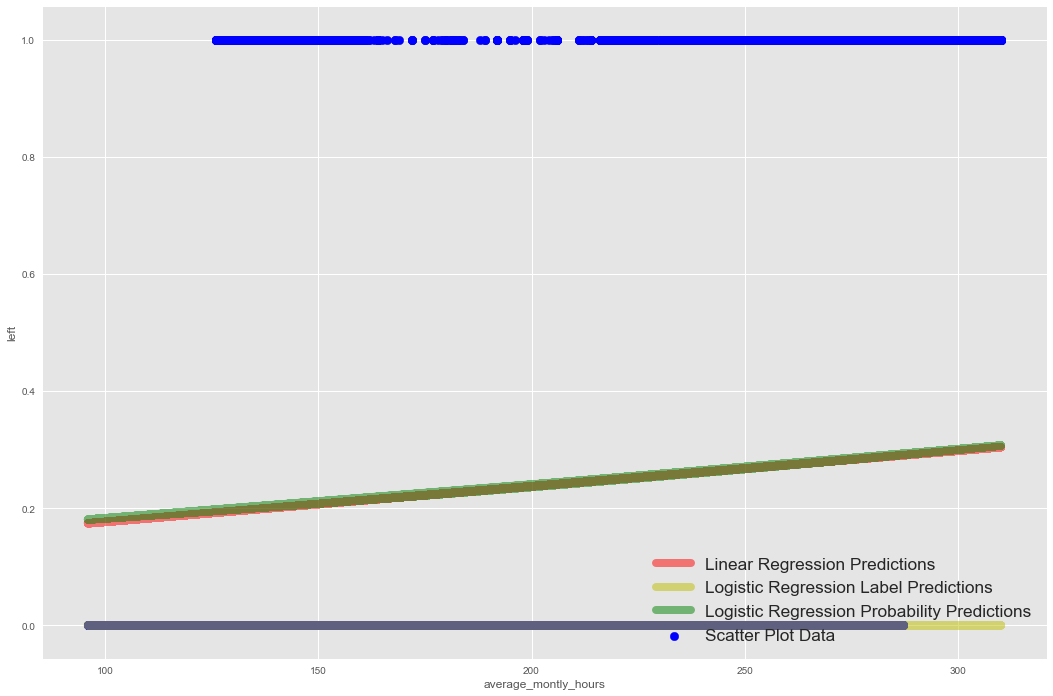

In [113]:
plt.figure(figsize=(18,12))
plt.xlabel("average_montly_hours")
plt.ylabel("left")
plt.scatter(X,y, s=70, c= "blue", alpha=1, label="Scatter Plot Data")
plt.plot(X, pred, c="r", linewidth=8, alpha=.5, label = "Linear Regression Predictions")
plt.plot(X, pred_labels, c="y", linewidth=8, alpha=.5, label = "Logistic Regression Label Predictions")
plt.plot(X, pred_probs, c="g", linewidth=8, alpha=.5, label = "Logistic Regression Probability Predictions")
plt.legend(loc=4, fontsize="xx-large");

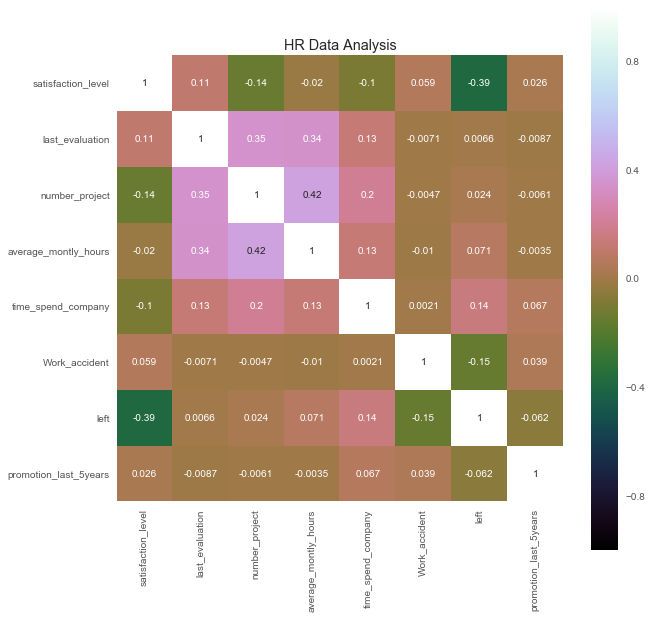

In [120]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('HR Data Analysis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118b53d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119b20310>]], dtype=object)

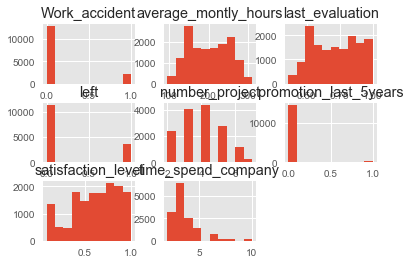

In [121]:
df.hist()

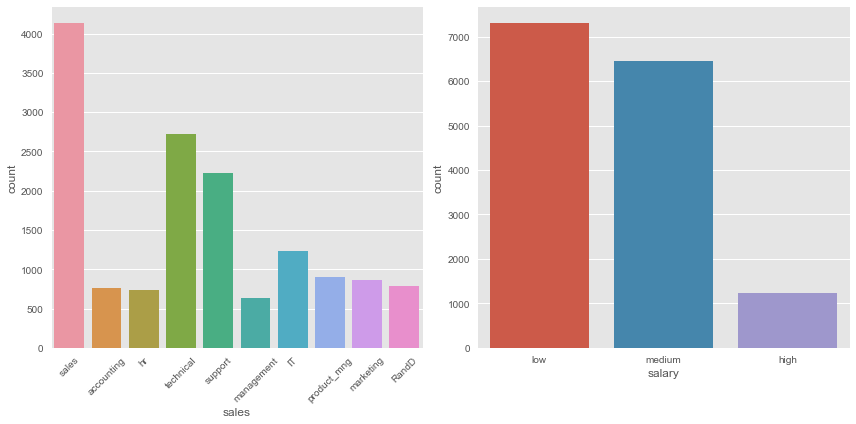

In [125]:
fig, axs = plt.subplots(ncols=2,figsize=(12,6))
g = sns.countplot(df["sales"], ax=axs[0])
plt.setp(g.get_xticklabels(), rotation=45)
g = sns.countplot(df["salary"], ax=axs[1])
plt.tight_layout()
plt.show()
plt.gcf().clear()

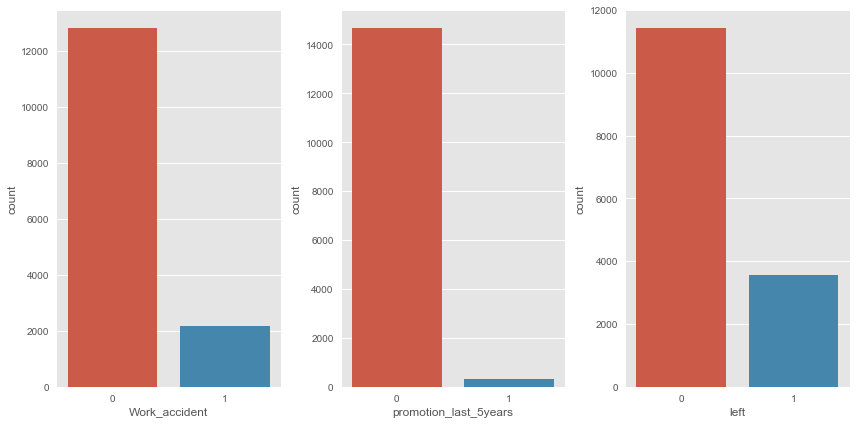

In [126]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
sns.countplot(df["Work_accident"], ax=axs[0])
sns.countplot(df["promotion_last_5years"], ax=axs[1])
sns.countplot(df["left"], ax=axs[2])
plt.tight_layout()
plt.show()
plt.gcf().clear()

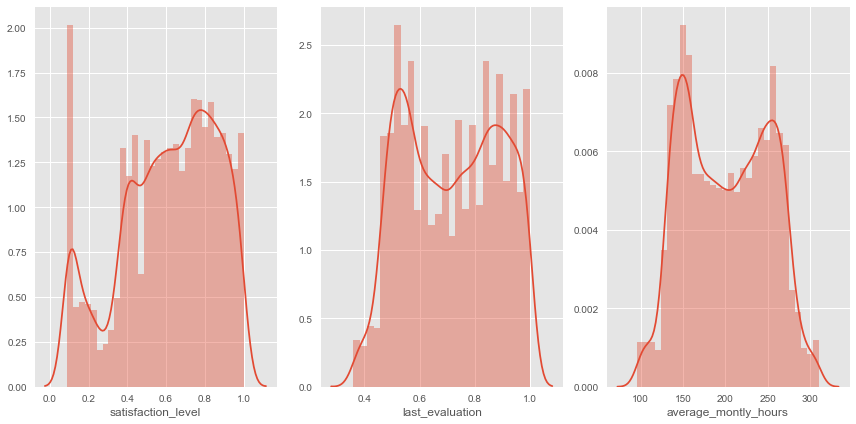

In [128]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
sns.distplot(df["satisfaction_level"], ax=axs[0])
sns.distplot(df["last_evaluation"], ax=axs[1])
sns.distplot(df["average_montly_hours"], ax=axs[2])
plt.tight_layout()
plt.show()
plt.gcf().clear()

NameError: name 'dataset' is not defined

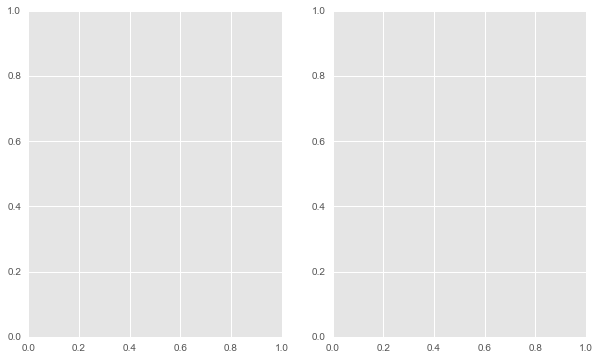

In [129]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
sns.factorplot(y="satisfaction_level",x="left",data=dataset,kind="box", ax=axs[0])
axs[1].hist(data_stay["satisfaction_level"],bins=6,label="Stay",alpha=0.7)
axs[1].hist(data_left["satisfaction_level"],bins=6,label="Left",alpha=0.7)
axs[1].set_xlabel("Satifaction level")
axs[1].set_ylabel("Count")
axs[1].legend()
plt.tight_layout()
plt.gcf().clear()

In [130]:
RFC = RandomForestClassifier()

cv_results = cross_val_score(RFC,X_train, Y_train, cv=kfold, scoring="accuracy")

cv_results.mean()

NameError: name 'RandomForestClassifier' is not defined